# ***INTERNSHIP PROJECT 2***
### **BY: S SRUTHI**

FASHION MNIST DATA CLASSIFICATION

**STEP-1 IMPORTING ALL LIBRARIES**


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

**STEP-2 LOADING DATASET**

In [2]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# Printing the shape of data

In [4]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [8]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
# showing the image

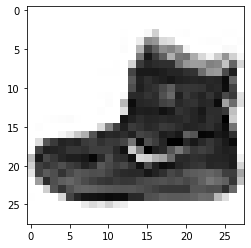

In [10]:
plt.imshow(X_train[0],cmap='Greys')

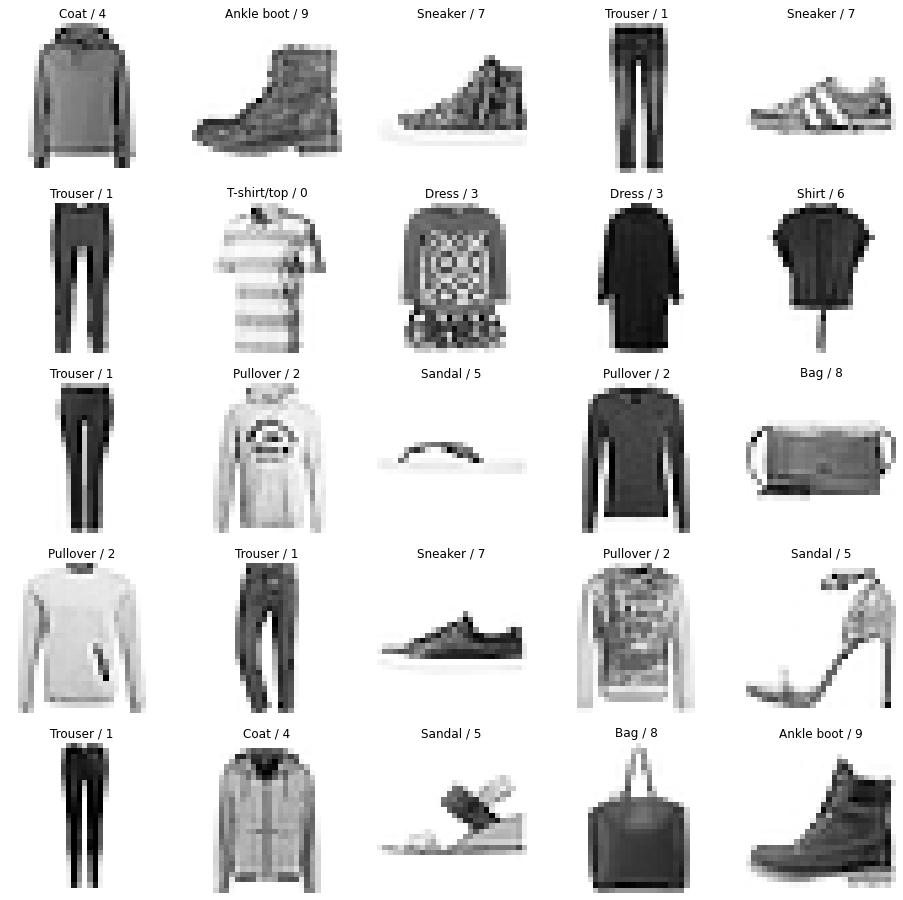

In [11]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [12]:
X_train.ndim

3

In [13]:
X_train = np.expand_dims(X_train,-1)

In [14]:
X_train.ndim

4

In [15]:
X_test=np.expand_dims(X_test,-1)

In [16]:
# feature scaling

In [17]:
X_train = X_train/255
X_test= X_test/255

In [18]:
# Split dataset

In [19]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [20]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

**STEP-3 BUILDING THE CNN MODEL**

In [21]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 32s 330ms/step - loss: 0.6264 - accuracy: 0.7886 - val_loss: 0.4289 - val_accuracy: 0.8536
Epoch 2/10
94/94 [==============================] - 19s 204ms/step - loss: 0.3850 - accuracy: 0.8646 - val_loss: 0.4043 - val_accuracy: 0.8569
Epoch 3/10
94/94 [==============================] - 19s 205ms/step - loss: 0.3371 - accuracy: 0.8820 - val_loss: 0.3300 - val_accuracy: 0.8866
Epoch 4/10
94/94 [==============================] - 19s 206ms/step - loss: 0.3063 - accuracy: 0.8923 - val_loss: 0.3158 - val_accuracy: 0.8922
Epoch 5/10
94/94 [==============================] - 21s 220ms/step - loss: 0.2840 - accuracy: 0.9010 - val_loss: 0.3116 - val_accuracy: 0.8923
Epoch 6/10
94/94 [==============================] - 19s 206ms/step - loss: 0.2672 - accuracy: 0.9053 - val_loss: 0.3011 - val_accuracy: 0.8942
Epoch 7/10
94/94 [==============================] - 19s 204ms/step - loss: 0.2516 - accuracy: 0.9110 - val_loss: 0.2837 - val_accuracy: 0.9005

In [25]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.2 , 0.07, 0.  ]], dtype=float32)

In [26]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2738 - accuracy: 0.8992


[0.27379879355430603, 0.8992000222206116]

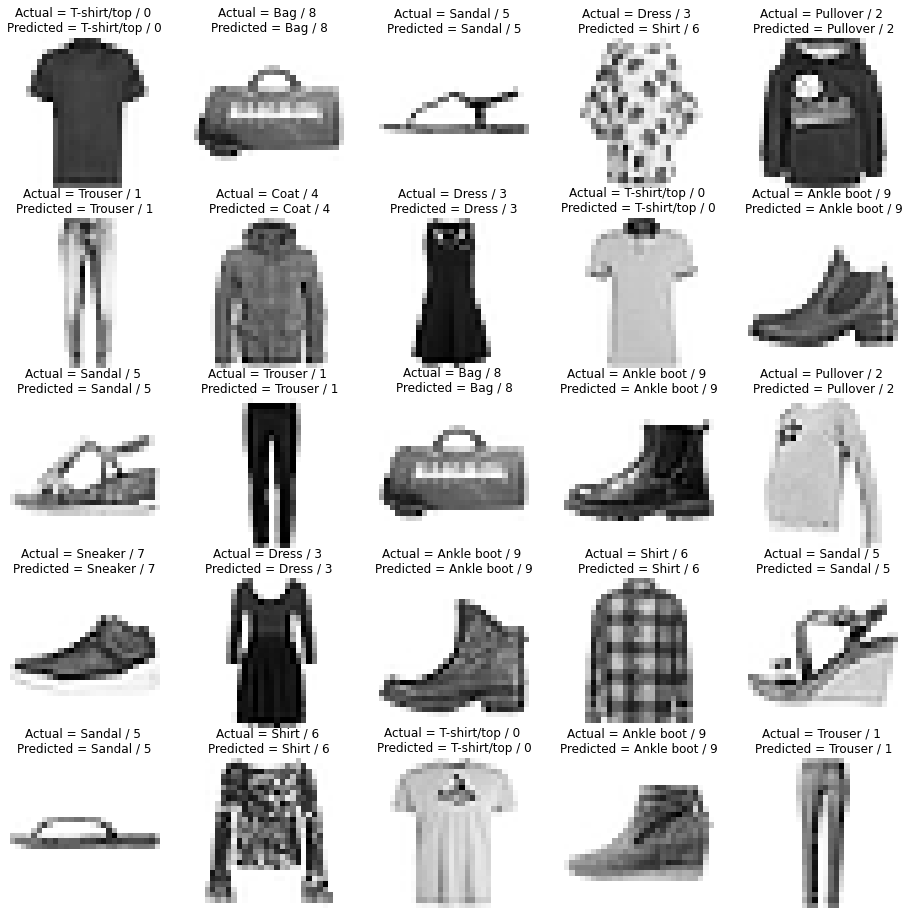

In [28]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

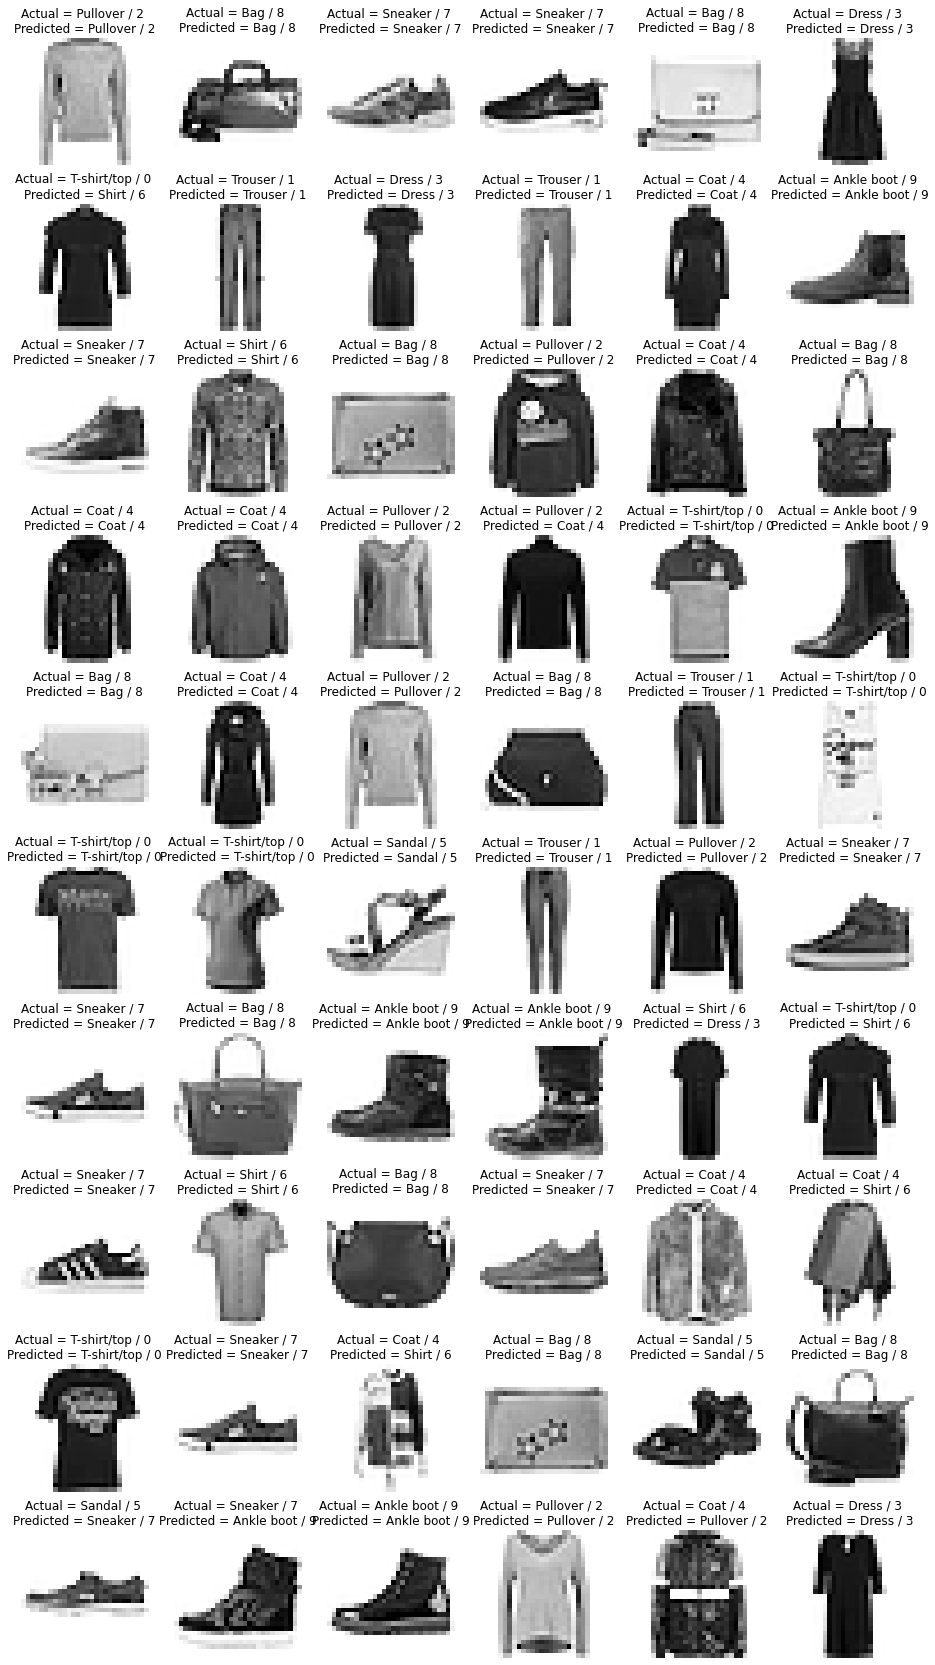

In [29]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [30]:
""" Confusion Matrix"""

' Confusion Matrix'

In [31]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.87      0.80      0.83      1000
       Dress       0.89      0.90      0.89      1000
        Coat       0.82      0.89      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.72      0.70      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



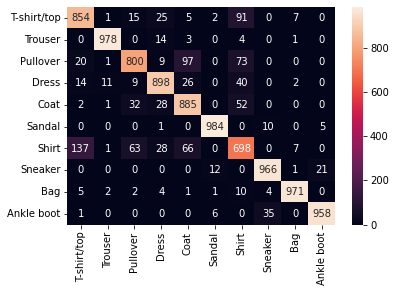

In [32]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [33]:
""" Save Model"""

' Save Model'

In [34]:
model.save('fashion_mnist_cnn_model.h5')

**BUILD 2 COMPLEX CNN**

In [35]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/10
94/94 [==============================] - 25s 259ms/step - loss: 1.0013 - accuracy: 0.6304 - val_loss: 0.5758 - val_accuracy: 0.7803
Epoch 2/10
94/94 [==============================] - 24s 258ms/step - loss: 0.5476 - accuracy: 0.7931 - val_loss: 0.4754 - val_accuracy: 0.8263
Epoch 3/10
94/94 [==============================] - 24s 259ms/step - loss: 0.4627 - accuracy: 0.8300 - val_loss: 0.4025 - val_accuracy: 0.8522
Epoch 4/10
94/94 [==============================] - 24s 259ms/step - loss: 0.4053 - accuracy: 0.8527 - val_loss: 0.3671 - val_accuracy: 0.8622
Epoch 5/10
94/94 [==============================] - 24s 259ms/step - loss: 0.3681 - accuracy: 0.8649 - val_loss: 0.3639 - val_accuracy: 0.8630
Epoch 6/10
94/94 [==============================] - 25s 261ms/step - loss: 0.3444 - accuracy: 0.8731 - val_loss: 0.3418 - val_accuracy: 0.8728
Epoch 7/10
94/94 [==============================] - 24s 260ms/step - loss: 0.3238 - accuracy: 0.8801 - val_loss: 0.3177 - val_accuracy: 0.8801

[0.2847956717014313, 0.9021999835968018]